# 第1章 向量和向量空间

## 1.1 向量

### 1.1.1 描述向量

In [3]:
import numpy as np
u = np.array([1, 6, 7])
u

array([1, 6, 7])

In [4]:
v = u.reshape(-1,1)
v

array([[1],
       [6],
       [7]])

In [10]:
import random, time

# 创建一个列表
lst = [random.randint(1, 100) for i in range(100000)]


start = time.time()
lst2 = [i*i for i in lst]    # 用列表解析的方式计算每个数的平方
end = time.time()
print(f"列表解析用时： {end - start}s")

vlst = np.array(lst)    # 将列表转换为数组表示的向量
start2 = time.time()
vlst2 = vlst * vlst    # 用数组相乘计算每个数的平方
end2 = time.time()
print(f"数组（向量）运算用时：{end2 - start2}s")
print(f"列表解析的运算时间是向量运算时间的：{round((end-start)/(end2-start2), 3)}倍")

列表解析用时： 0.005980014801025391s
数组（向量）运算用时：0.0001800060272216797s
列表解析的运算时间是向量运算时间的：33.221倍


In [11]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer=CountVectorizer()                                              # (1)
corpus=["mathematics machine learn", "learn python learn mathematics"]    # (2)
cor_vec = vectorizer.fit_transform(corpus)                                # (3)
vectorizer.get_feature_names()                                            # (4)

['learn', 'machine', 'mathematics', 'python']

In [12]:
print(cor_vec)

  (0, 2)	1
  (0, 1)	1
  (0, 0)	1
  (1, 2)	1
  (1, 0)	2
  (1, 3)	1


In [13]:
import pandas as pd
df = pd.DataFrame(cor_vec.toarray(), columns=vectorizer.get_feature_names())
df

,learn,machine,mathematics,python
0,1,1,1,0
1,2,0,1,1


In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trans = TfidfTransformer()
tfidf = tfidf_trans.fit_transform(cor_vec)

# 每个字词的idf
tfidf_trans.idf_

array([1.        , 1.40546511, 1.        , 1.40546511])

In [15]:
tfidf.toarray()

array([[0.50154891, 0.70490949, 0.50154891, 0.        ],
       [0.75726441, 0.        , 0.37863221, 0.53215436]])

### 1.1.2 向量的加法

In [16]:
import numpy as np
np.array([[2],[1]]) + np.array([[3], [3]])

array([[5],
       [4]])

In [17]:
np.array([[2],[1]]) - np.array([[3], [3]])

array([[-1],
       [-2]])

### 1.1.3 向量的数量乘法

In [18]:
2 * np.array([[3], [1]])

array([[6],
       [2]])

In [19]:
-1 * np.array([[3], [1]])

array([[-3],
       [-1]])

## 1.2 向量空间

### 1.2.3 线性无关

In [27]:
df = pd.DataFrame({'A':[1,2,3],'B':[2,4,6],'C':[4,8,12],'target':[1,0,1]})
df

,A,B,C,target
0,1,2,4,1
1,2,4,8,0
2,3,6,12,1


In [21]:
df = pd.read_csv("./datasets/train.csv")
df_parts = df[['Survived', 'Sex', 'Age', 'Fare']]  # 获取部分特征
df_parts.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [23]:
df_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [24]:
pd.get_dummies(df_parts[['Sex']]).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
df_parts['Male'] = pd.get_dummies(df_parts[['Sex']], drop_first=True)
df_parts.head()

,Survived,Sex,Age,Fare,Male
0,0,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,1,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,0,male,35.0,8.0500,1


## 1.3 基和维数

### 1.3.3 维数

In [32]:
import numpy as np

u = np.array([2, 3, 4])
u.ndim

1

In [33]:
u2 = np.array([[2], [3], [4]])
u2.ndim

2

In [34]:
a = np.arange(12).reshape((3, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
a.ndim

2

In [39]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,virginica
99,5.7,2.8,4.1,1.3,versicolor


## 1.4 内积空间

### 1.4.2 点积和欧几里得空间

In [40]:
import numpy as np
a = np.array([3,5,7])
b = np.array([2,4,0])
np.dot(a, b)

26

In [41]:
np.inner(a, b)

26

In [42]:
c = np.array([[1,2], [3,4]])
d = np.array([[5,6], [7,8]])
np.dot(c, d)

array([[19, 22],
       [43, 50]])

In [43]:
np.inner(c, d)

array([[17, 23],
       [39, 53]])

## 1.5 距离和角度

### 1.5.1 距离

In [50]:
import numpy as np
vec1 = np.array([1, 2])
vec2 = np.array([9, 8])
dist = np.linalg.norm(vec1 - vec2)
print(dist)

10.0


In [52]:
from scipy.spatial.distance import cityblock

a = np.array([2,3,4])
b = np.array([9,8,7])
md = cityblock(a, b)
md

15

### 1.5.2 基于距离的分类

In [85]:
import seaborn as sns
import pandas as pd
import numpy as np

iris = sns.load_dataset('iris')
seto1 = iris.iloc[7]
seto2 = iris.iloc[28]
vers = iris.iloc[72]
df = pd.DataFrame([seto1, seto2, vers])
df

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor


In [86]:
X = df.iloc[:,:-1]    # 得到除了标签特征 species 之外的数据

# 两个 setosa 间的距离
dist_seto = np.linalg.norm(X.iloc[1] - X.iloc[0])
dist_seto

0.22360679774997916

In [87]:
# versicolor 与一个 setosa 的距离
dist_vers = np.linalg.norm(X.iloc[2] - X.iloc[0])
dist_vers

3.968626966596886

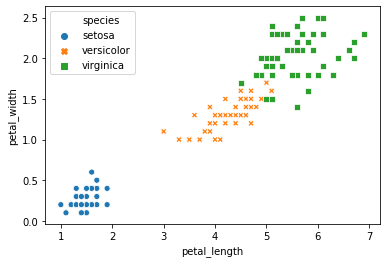

In [90]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", style="species")

In [92]:
from sklearn.datasets import load_iris  #鸢尾花是经典的数据集，很多库都集成
from sklearn.neighbors import KNeighborsClassifier  # 引入k-NN模型

iris = load_iris()
X = iris.data
y = iris.target

knn_l1 = KNeighborsClassifier(p=1)    # 基于曼哈顿距离
knn_l2 = KNeighborsClassifier(p=2)    # 基于欧几里得距离

# 训练模型
knn_l1.fit(X, y)
knn_l2.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
flower_l1 = knn_l1.predict([[2.7, 5.2, 6.3, 0.2]])
flower_l2 = knn_l2.predict([[2.7, 5.2, 6.3, 0.2]])
flower_l1_name = iris.target_names[flower_l1]
flower_l2_name = iris.target_names[flower_l2]

print("the instance [2.7, 5.2, 6.3, 0.2] is:")
print(flower_l1_name.item(), " by Manhattan Distance;")
print(flower_l2_name.item(), " by Euclidean Distance.")

the instance [2.7, 5.2, 6.3, 0.2] is:
virginica  by Manhattan Distance;
versicolor  by Euclidean Distance.


### 1.5.3 范数和正则化

In [94]:
import numpy as np
a = np.array([[3], [4]])
L1 = np.linalg.norm(a, ord=1)
print(L1)

7.0


In [95]:
L2 = np.linalg.norm(a)
L2

5.0

### 1.5.4 角度

In [96]:
import numpy as np
from scipy.spatial.distance import cosine

a = np.array([1,0,0])
b = np.array([0,1,0])
cosine(a, b)

1.0